In [14]:
import numpy as np
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import helper
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [15]:
imgpath="E:\\Projects\\github\\Document_scanner\\1.jpg"

In [16]:
image = cv2.imread(imgpath)
ratio = image.shape[0] / 800.0
print(f'original img shape{image.shape}')

orig = image.copy()
image = imutils.resize(image, height = 800)
print(f'resized img shape{image.shape}')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 50, 150)

original img shape(1161, 871, 3)
resized img shape(800, 600, 3)


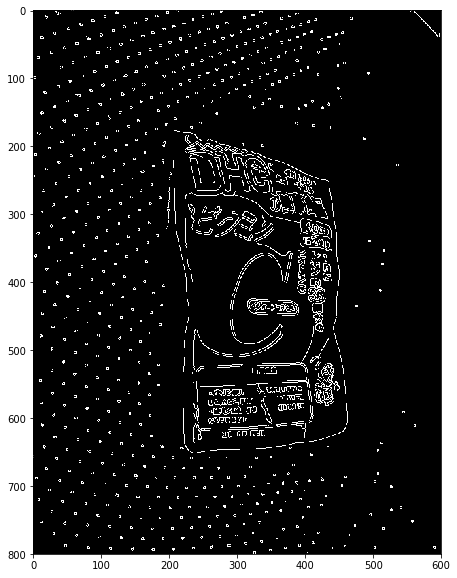

In [17]:
plt.imshow(edged,cmap='gray')

In [18]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
cnts

[array([[[207, 177]],
 
        [[207, 220]],
 
        [[206, 221]],
 
        [[206, 231]],
 
        [[207, 232]],
 
        [[207, 261]],
 
        [[208, 262]],
 
        [[208, 295]],
 
        [[209, 296]],
 
        [[209, 314]],
 
        [[210, 315]],
 
        [[210, 324]],
 
        [[211, 325]],
 
        [[211, 330]],
 
        [[212, 331]],
 
        [[212, 335]],
 
        [[213, 336]],
 
        [[213, 340]],
 
        [[214, 341]],
 
        [[214, 344]],
 
        [[215, 345]],
 
        [[215, 348]],
 
        [[216, 349]],
 
        [[216, 353]],
 
        [[217, 354]],
 
        [[217, 358]],
 
        [[218, 359]],
 
        [[218, 362]],
 
        [[219, 363]],
 
        [[219, 367]],
 
        [[220, 368]],
 
        [[220, 372]],
 
        [[221, 373]],
 
        [[221, 376]],
 
        [[222, 377]],
 
        [[222, 381]],
 
        [[223, 382]],
 
        [[223, 386]],
 
        [[224, 387]],
 
        [[224, 391]],
 
        [[225, 392]],
 
        [[225, 4

In [19]:
len(cnts)

5

In [20]:
for i in cnts:
    perimeter = cv2.arcLength(i, True)   
    approx = cv2.approxPolyDP(i, 0.02 * perimeter, True)
    if len(approx) == 4:
        screenCnt = approx
        break

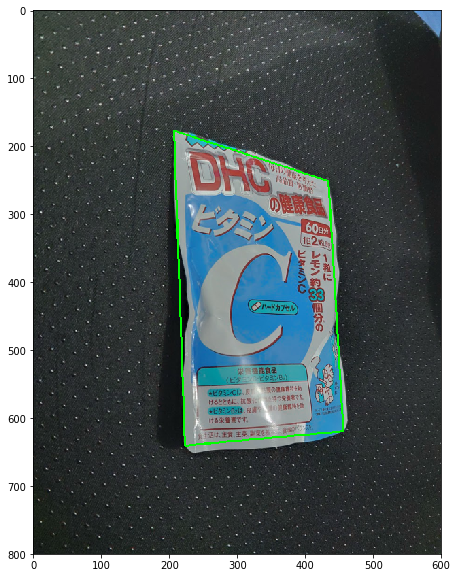

In [21]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)

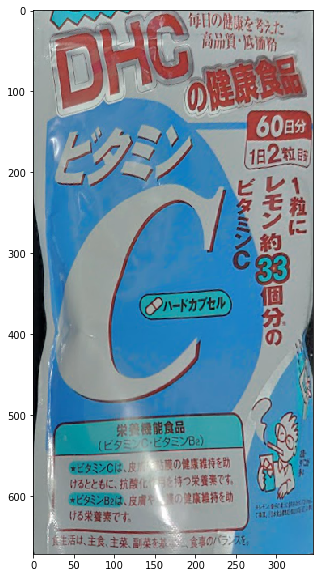

In [22]:
warped = helper.four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
plt.imshow(warped)

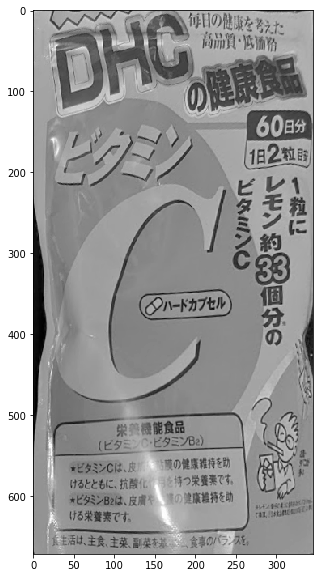

In [23]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
plt.imshow(warped,cmap='gray')

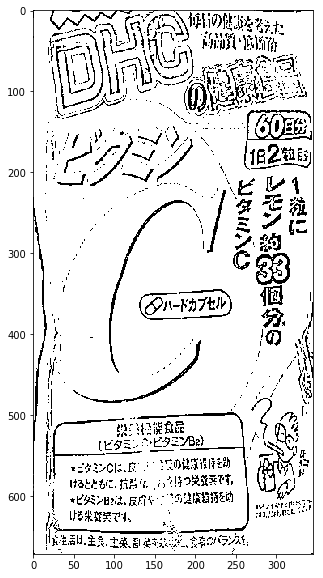

In [24]:
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped2 = (warped > T).astype("uint8") * 255
plt.imshow(warped2,cmap='gray')

In [25]:
cv2.imwrite('resulta.png',warped)
cv2.imwrite('resultb.png',warped2)

True

Text(0.5, 1.0, 'After threshold local')

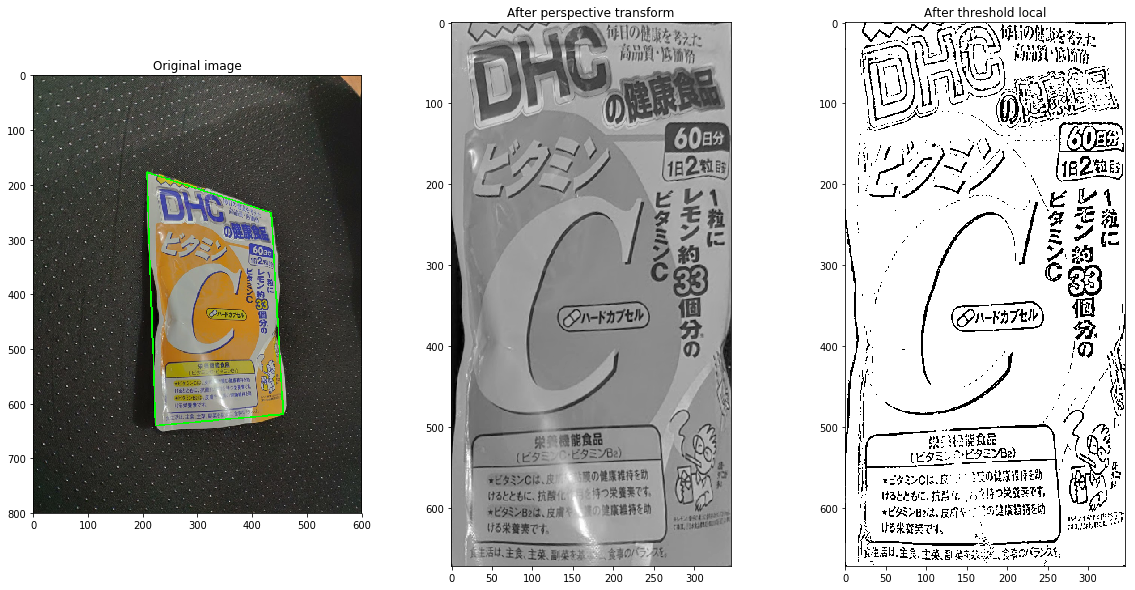

In [26]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(image2)
ax2.imshow(warped,cmap='gray')
ax3.imshow(warped2,cmap='gray')

ax1.set_title("Original image")
ax2.set_title("After perspective transform")
ax3.set_title("After threshold local")